In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from toolkit import pipeline

In [268]:
data = pd.read_csv("depression_data.csv")

In [269]:
data.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


# 0. Wstępna analiza

Chronic Medical Conditions - zmienna objaśniana

In [270]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

W naszym zbiorze danych nie ma braków danych

In [271]:
data["Chronic Medical Conditions"].value_counts()

Chronic Medical Conditions
No     277561
Yes    136207
Name: count, dtype: int64

In [272]:
(data["Chronic Medical Conditions"] == "Yes").mean()

0.3291868873378318

# 1. Macierz korelacji

<Axes: >

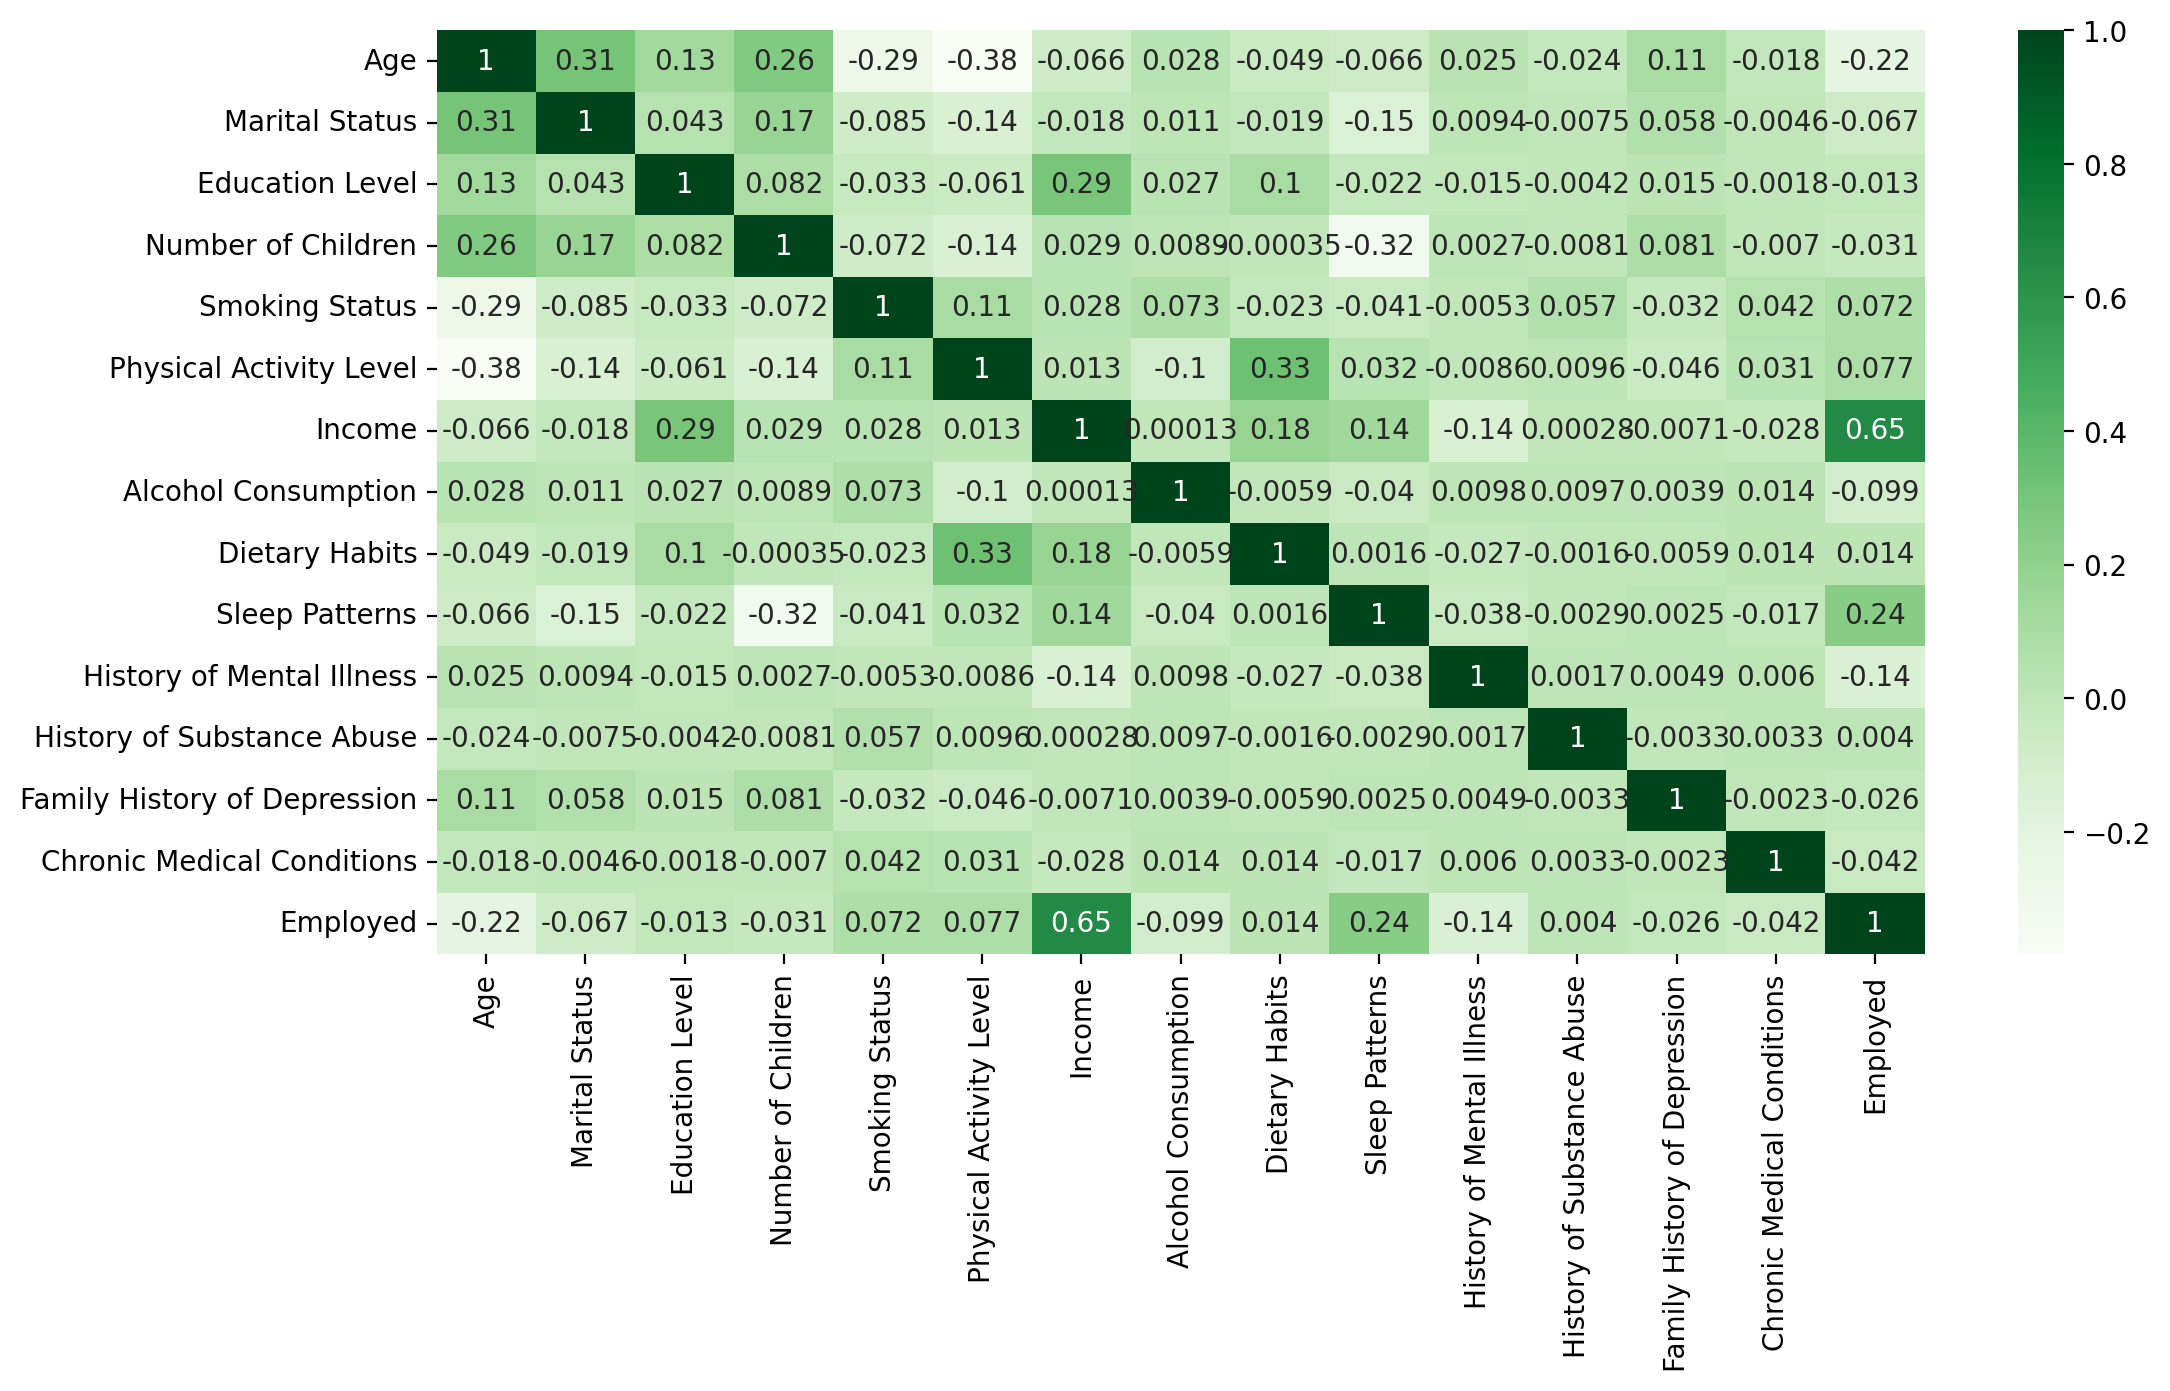

In [273]:
sns.heatmap(pipeline(pd.read_csv("depression_data.csv")).corr(), cmap="Greens", annot=True)

Jest duża korelacja między przychodem a statusem zatrudnienia. 
Są też mniejsze korelacje między odżywianiem a aktywnością dizyczną, poziomem wykształcenia i przychodem oraz jakością snu i statusem zatrudnienia

<Axes: xlabel='Employment Status', ylabel='Income'>

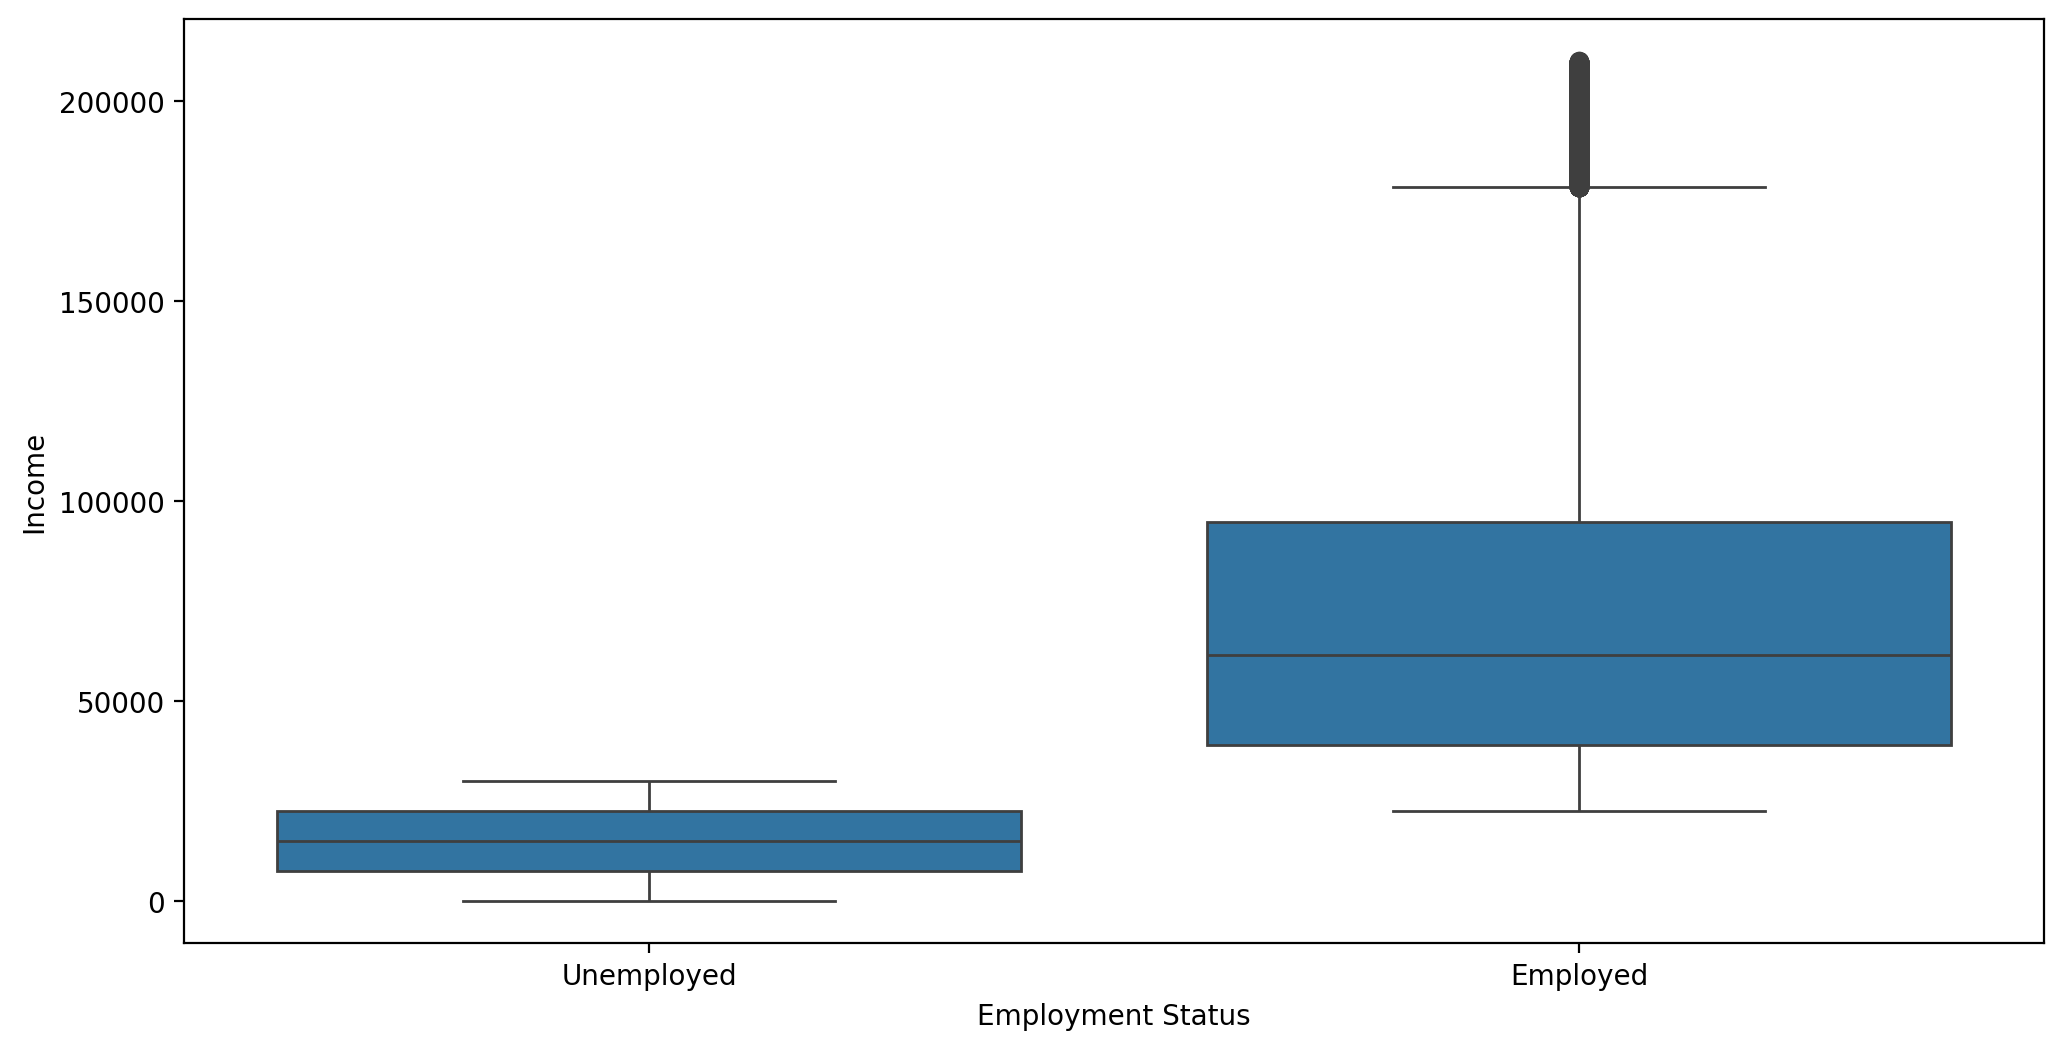

In [274]:
sns.boxplot(data=data, x="Employment Status", y="Income")

# 2. Rozkłady zmiennych

In [275]:
data.drop("Name", inplace=True, axis=1)

In [276]:
categorical_columns = [col for col in data.drop("Chronic Medical Conditions", axis=1, inplace=False).columns if data[col].dtype in ["object", "bool"]]

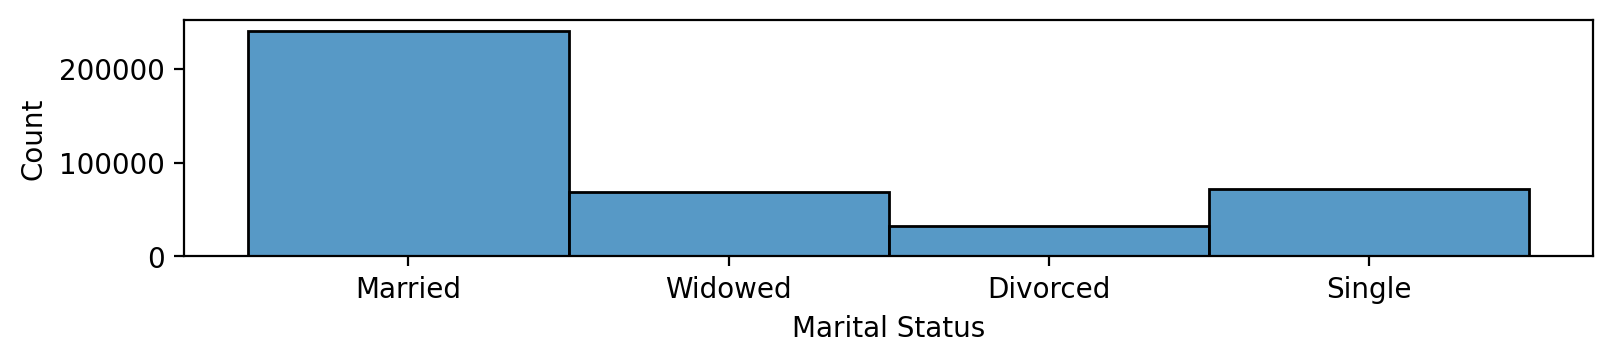

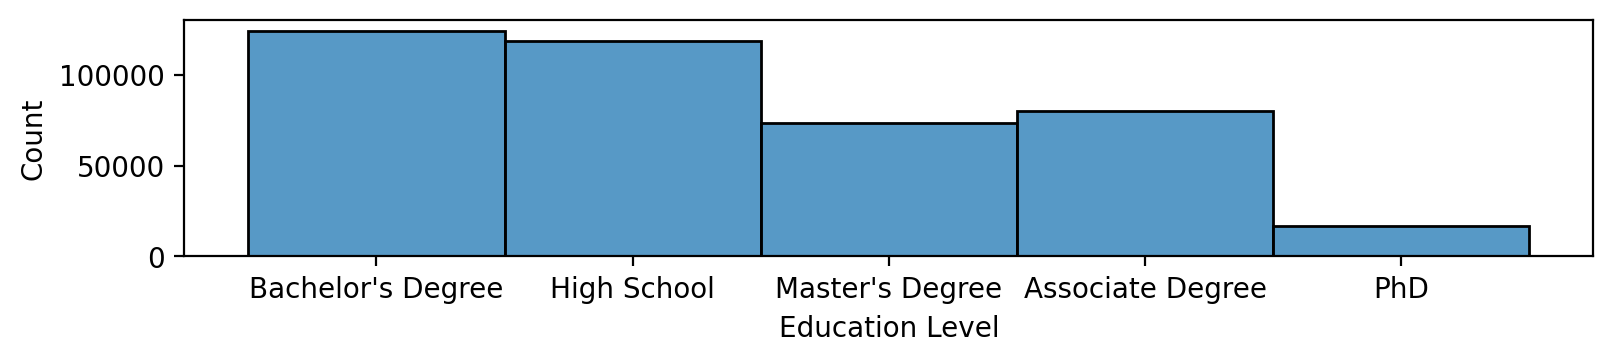

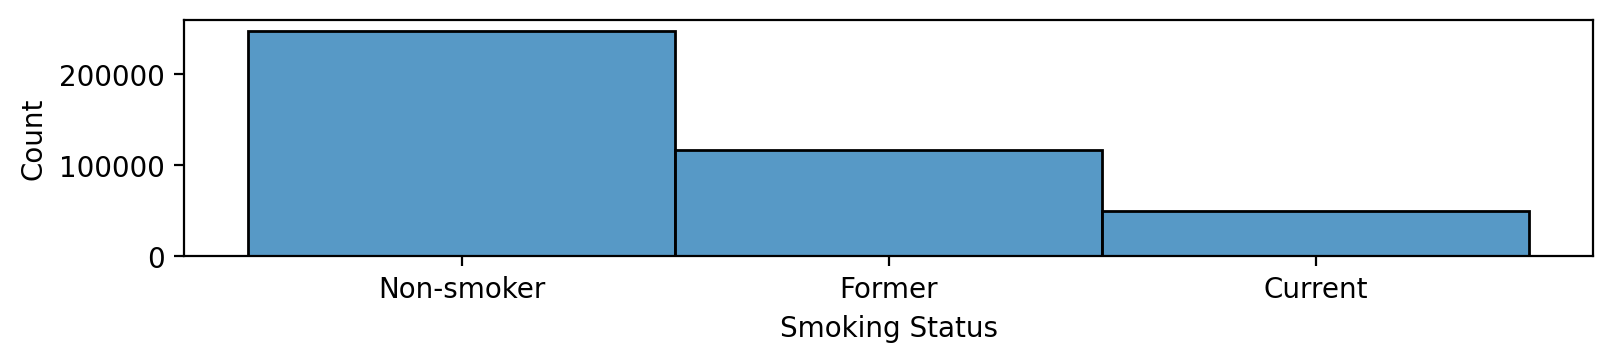

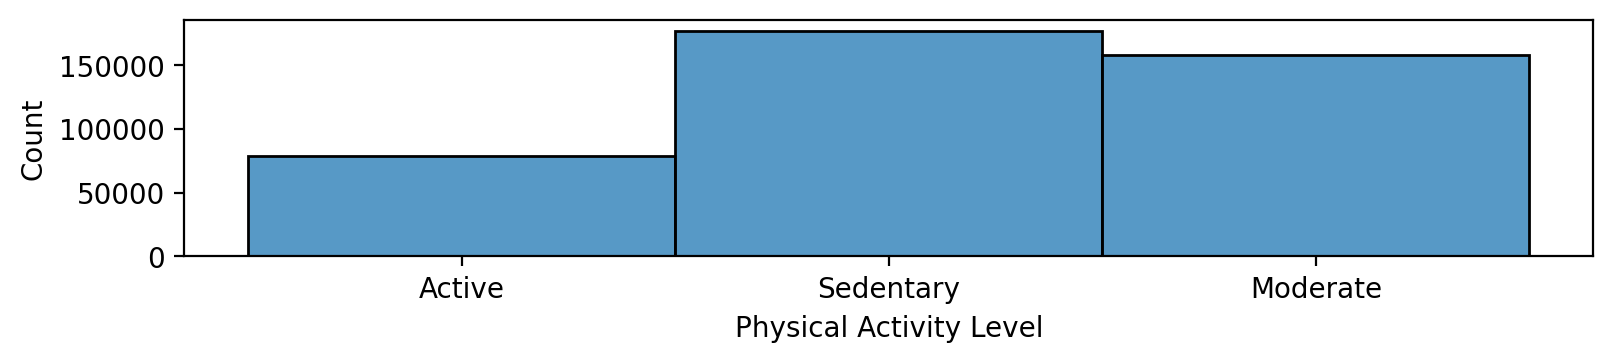

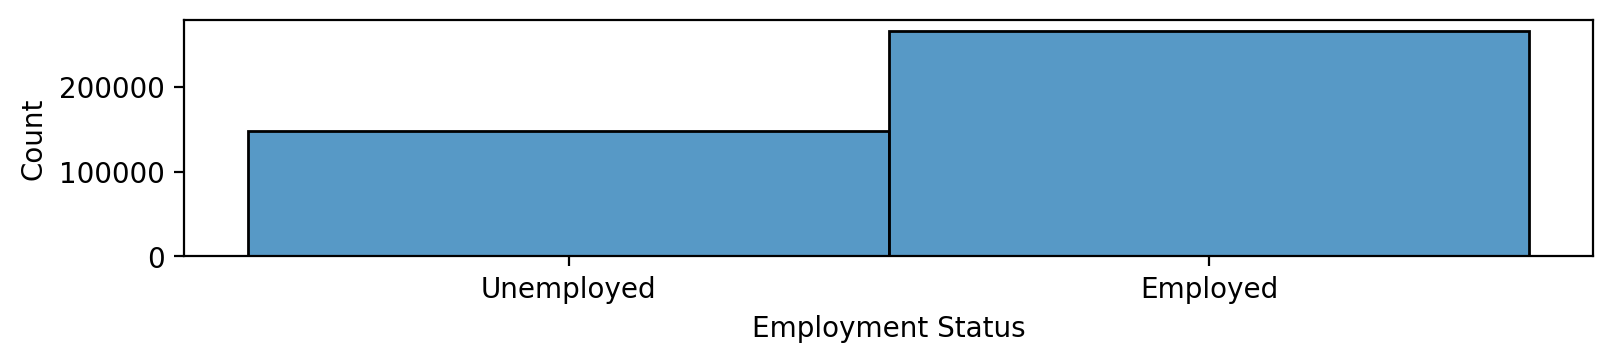

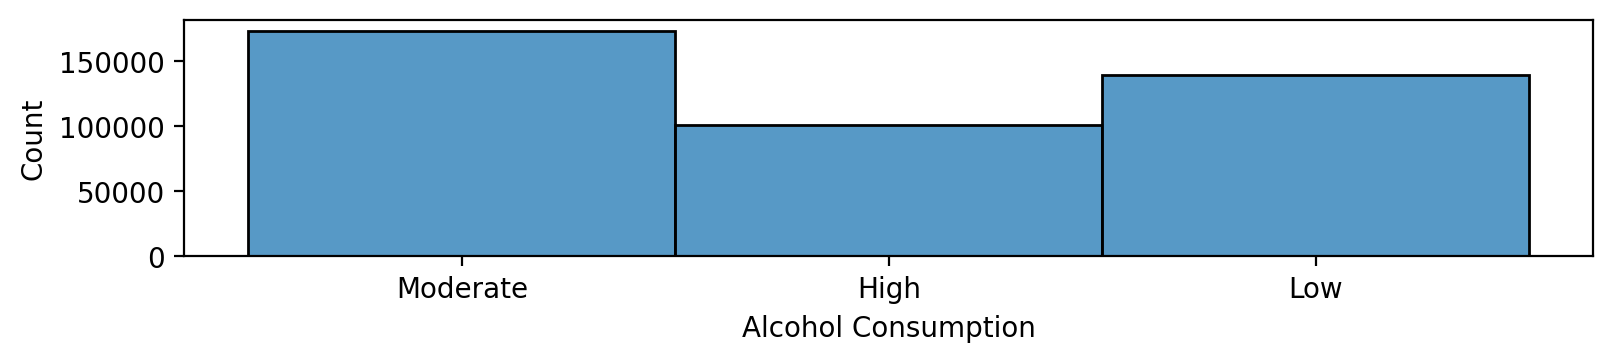

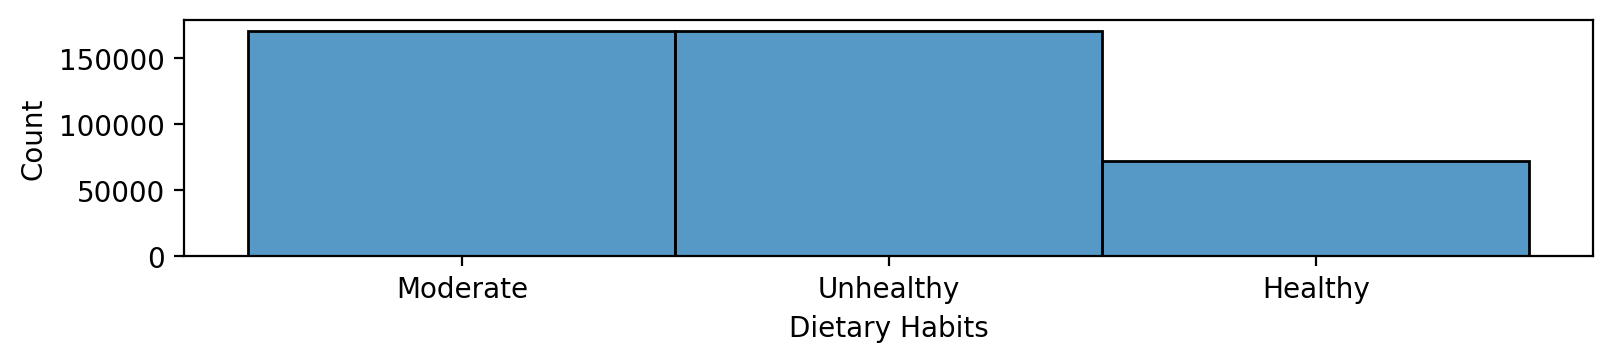

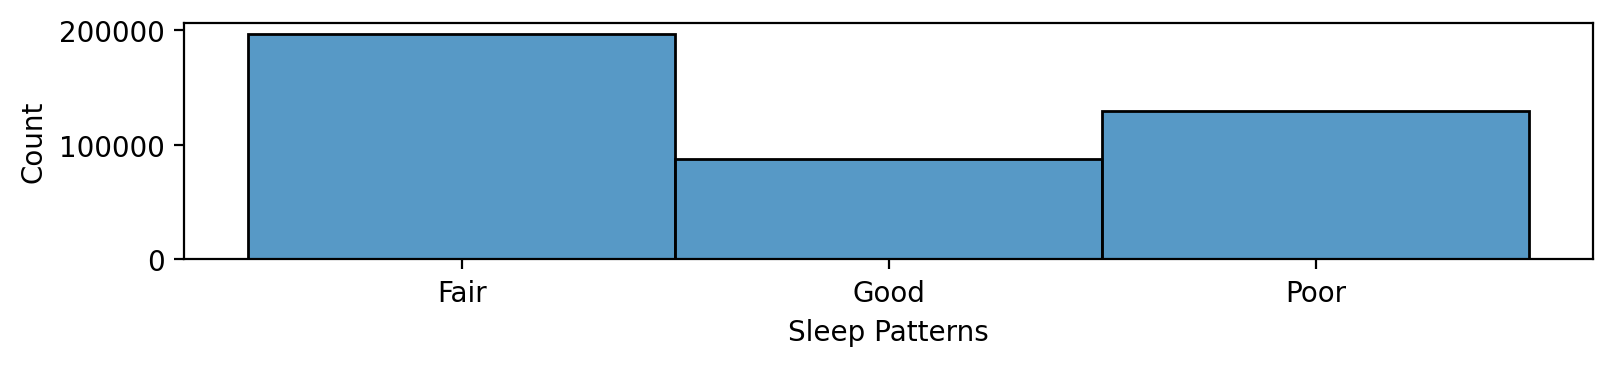

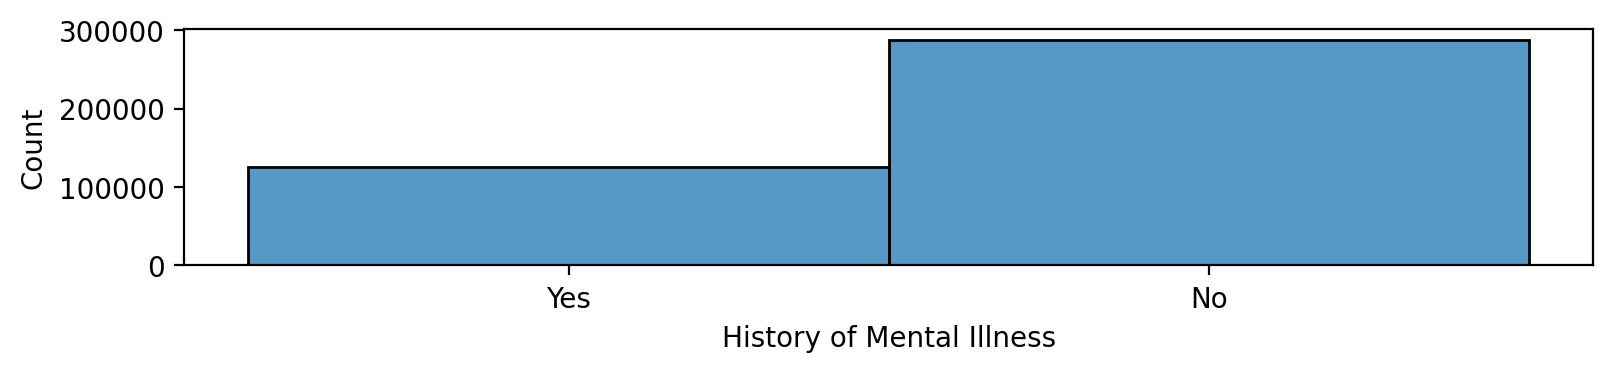

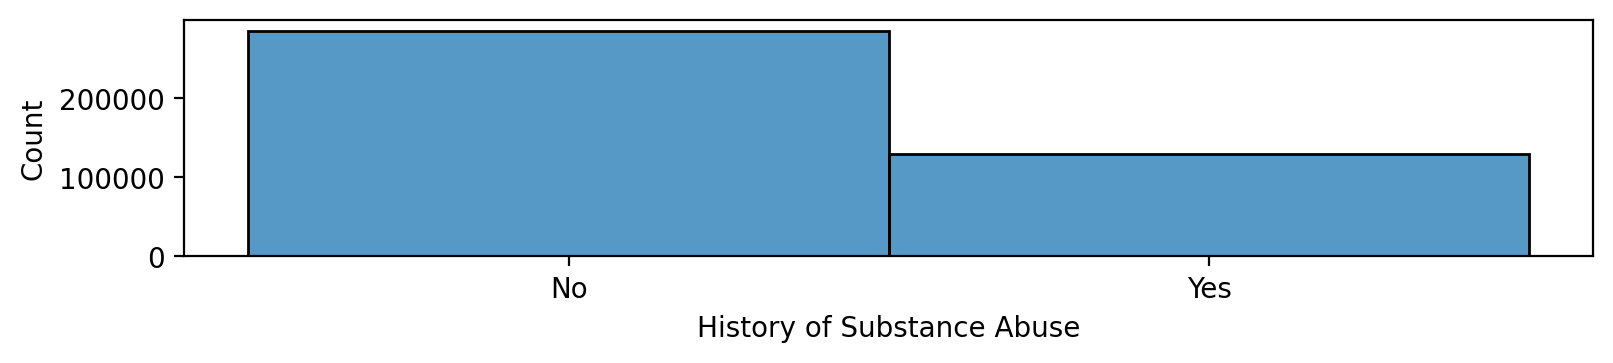

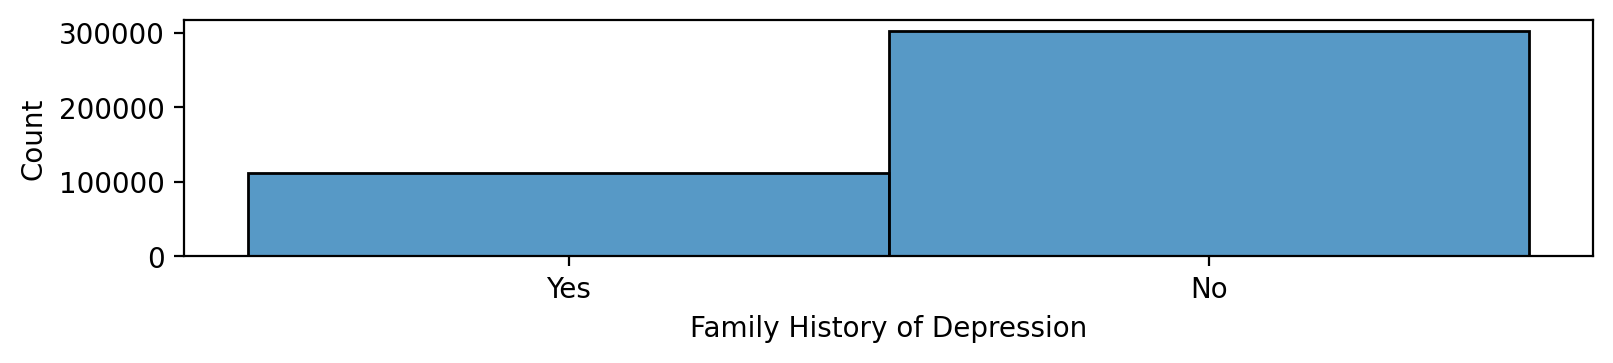

In [277]:
for index in range(len(categorical_columns)):
    plt.figure(figsize=(20, 20))
    plt.subplot(len(categorical_columns), 2, index+1)
    sns.histplot(data=data, x=categorical_columns[index])

<Axes: xlabel='Number of Children', ylabel='Count'>

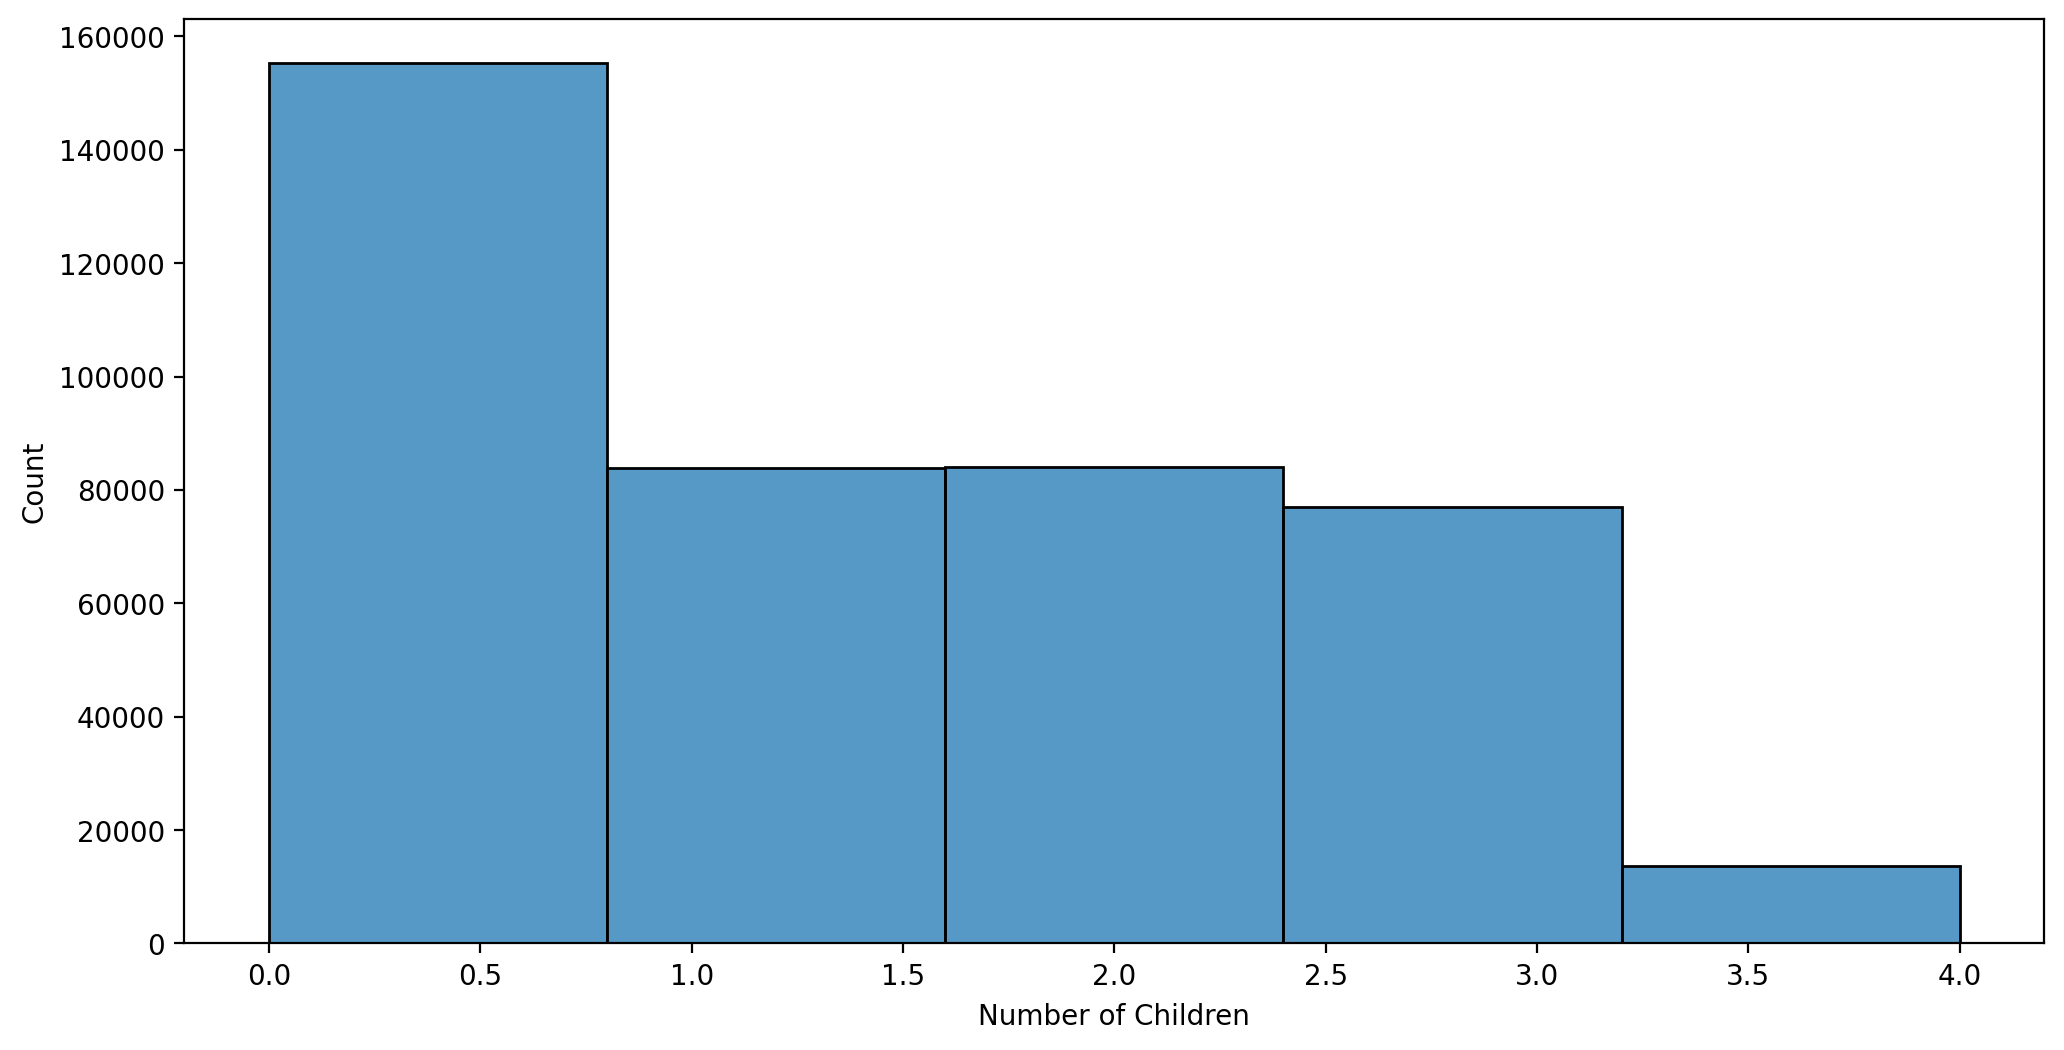

In [278]:
sns.histplot(data=data, x="Number of Children", bins=5)

<Axes: ylabel='Income'>

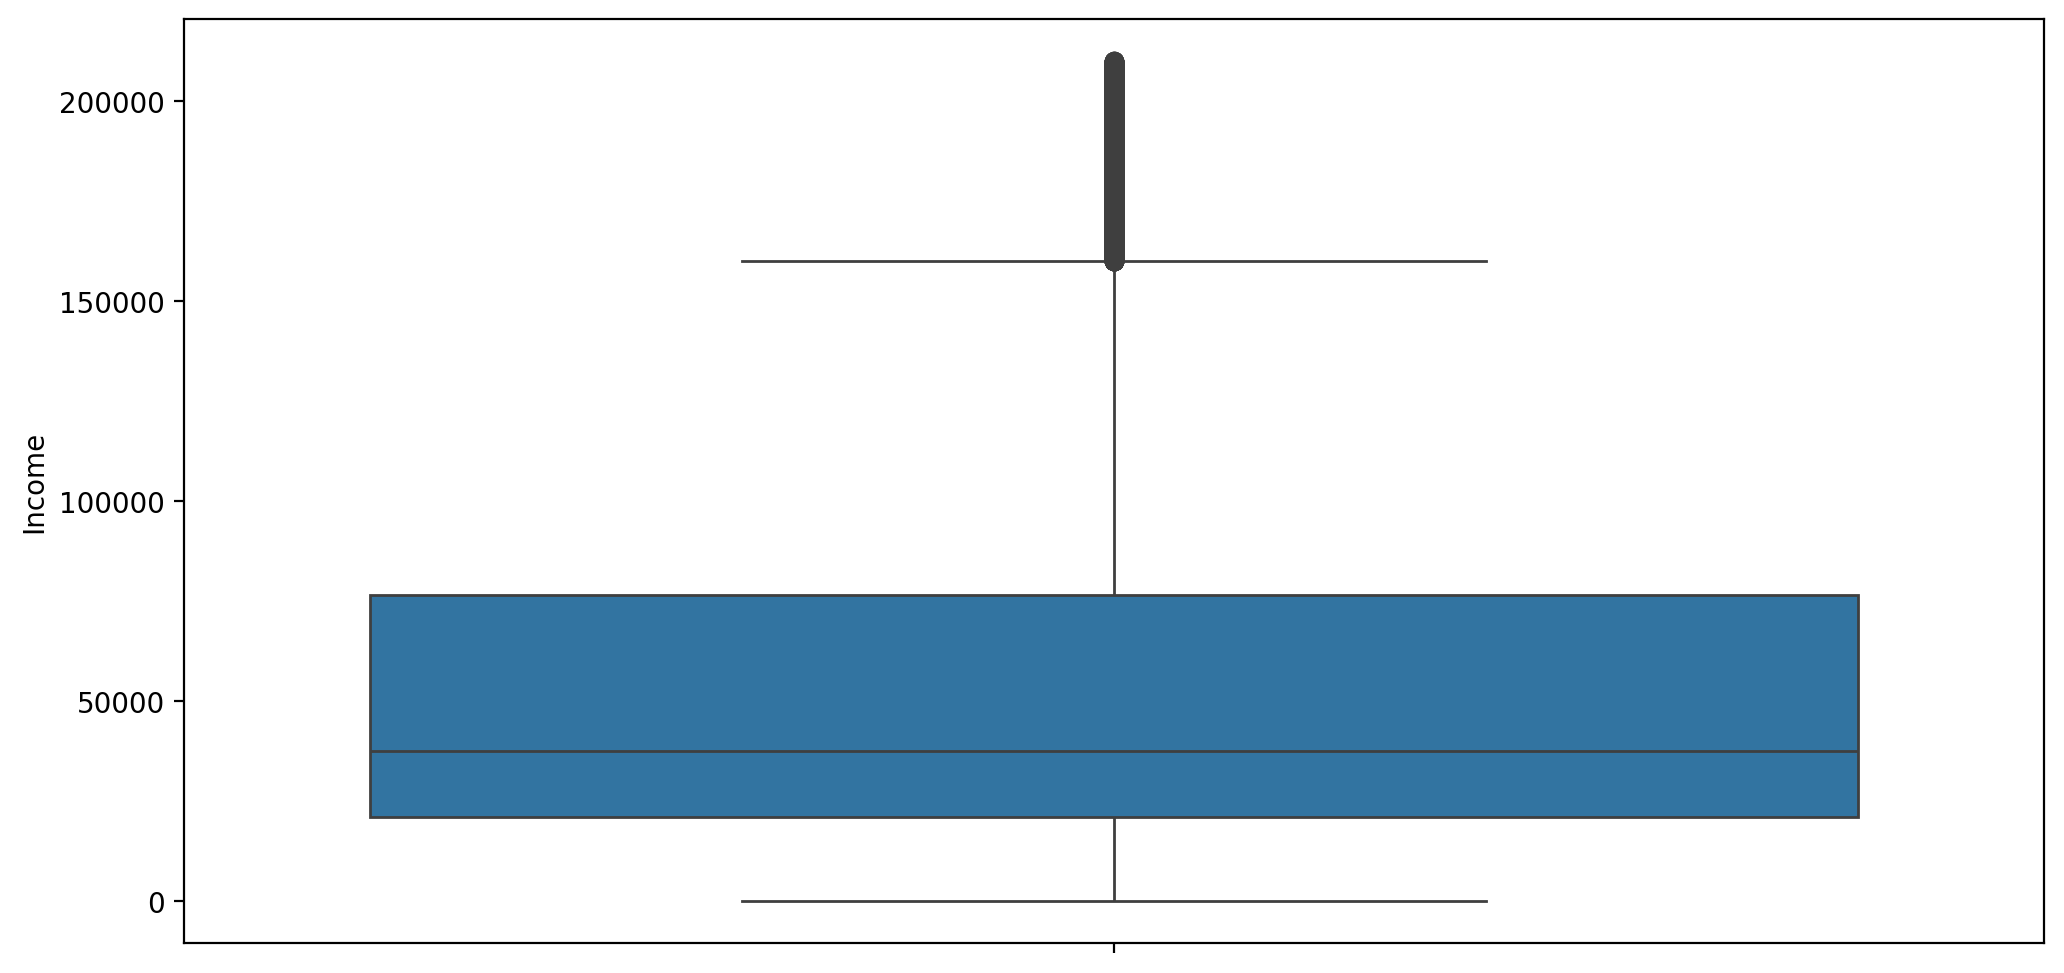

In [279]:
sns.boxplot(data=data, y="Income")

<Axes: ylabel='Age'>

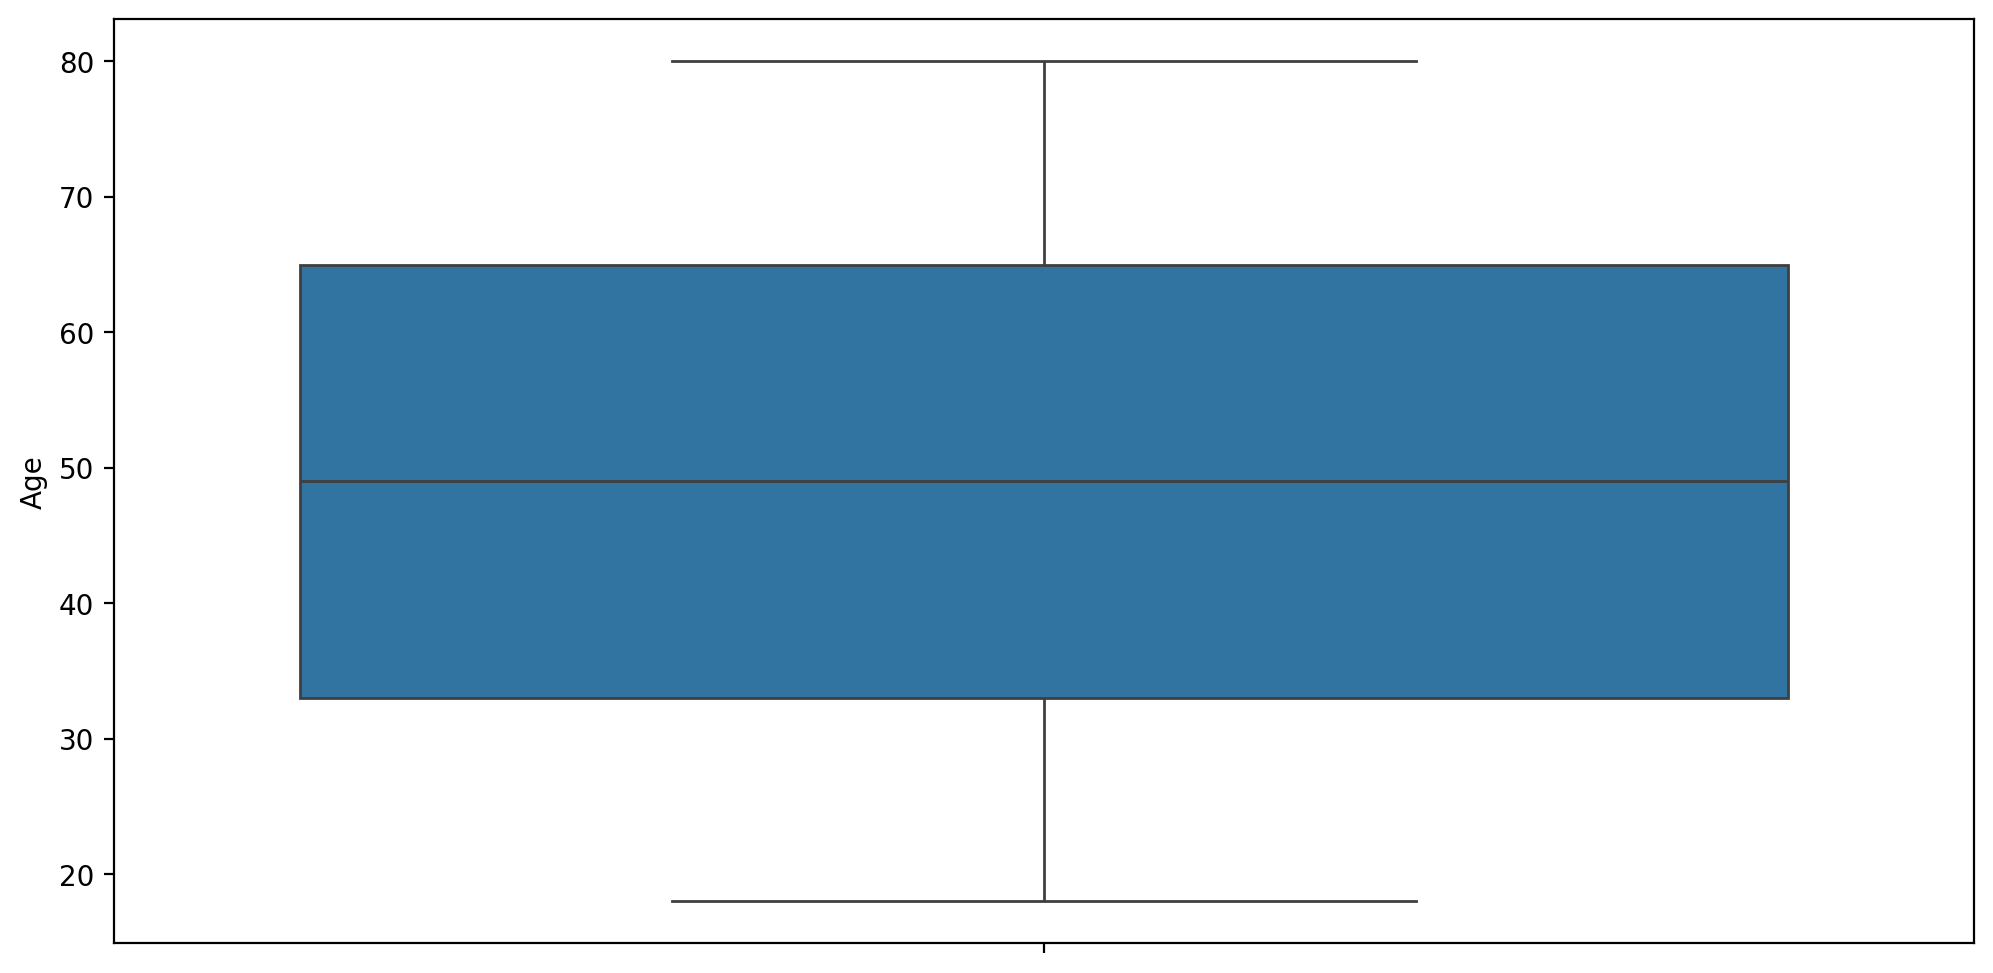

In [280]:
sns.boxplot(data=data, y="Age")

In [281]:
data.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


Zmienne są rozożone dość równomiernie. W przypadku dochodu są outliery powyżej ok. 160000

# 3. Rozkład według zmiennej objaśnianej

In [282]:
for column_name in [
    "History of Mental Illness", 
    "History of Substance Abuse", 
    "Family History of Depression",
    "Chronic Medical Conditions"
    ]:
    data[column_name] = (data[column_name] == "Yes")

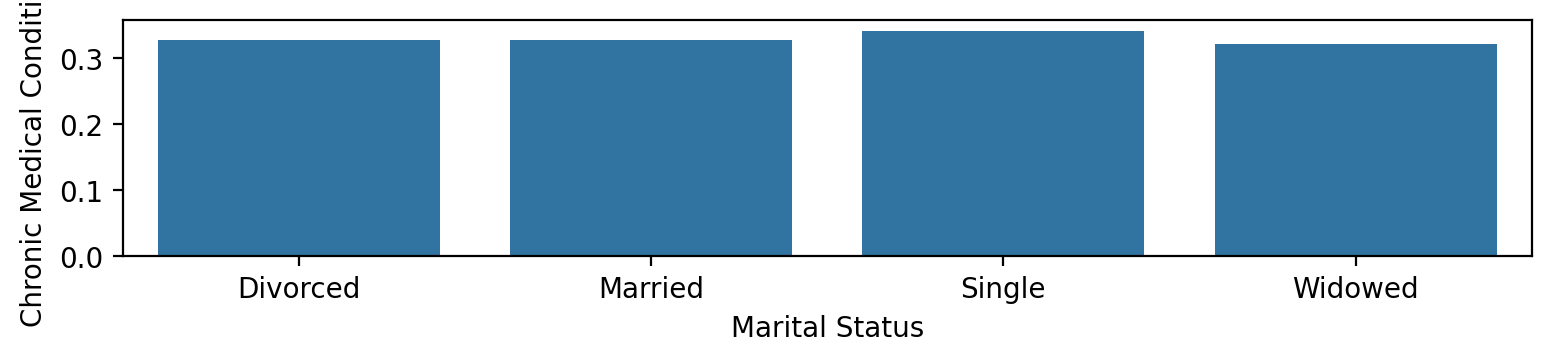

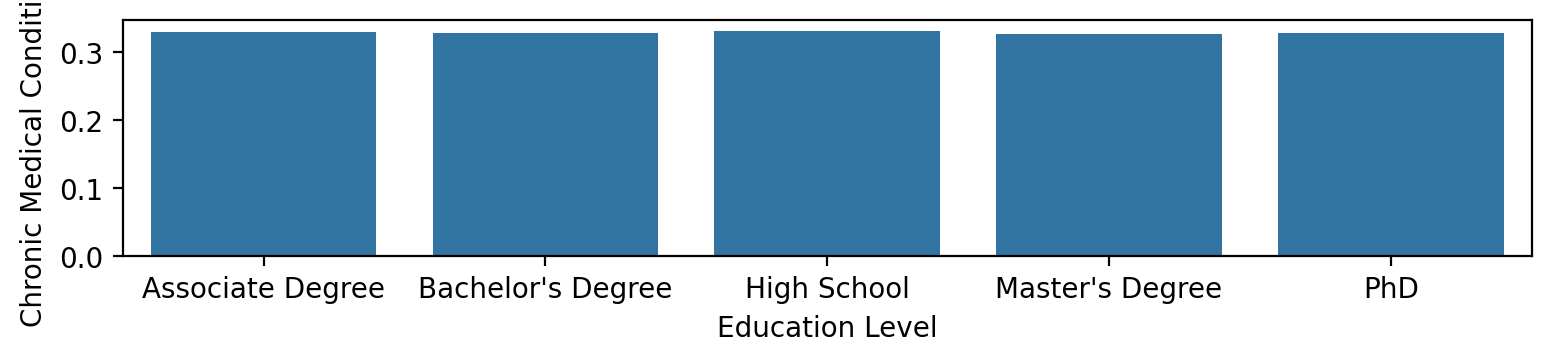

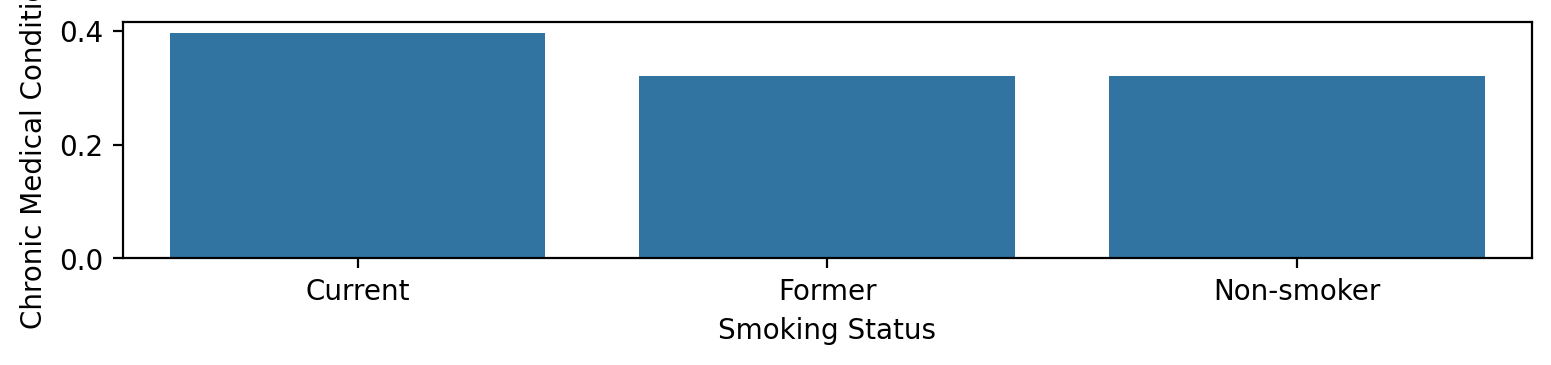

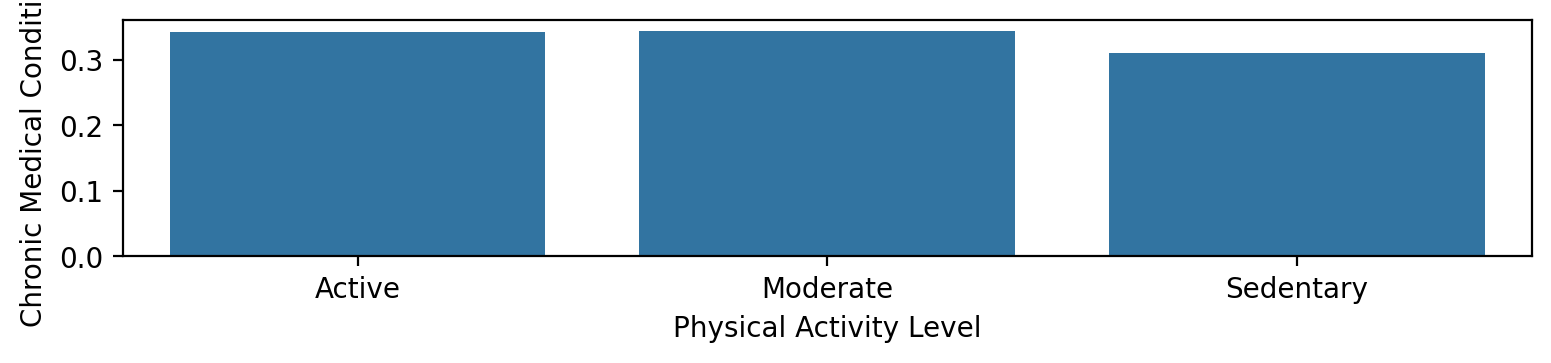

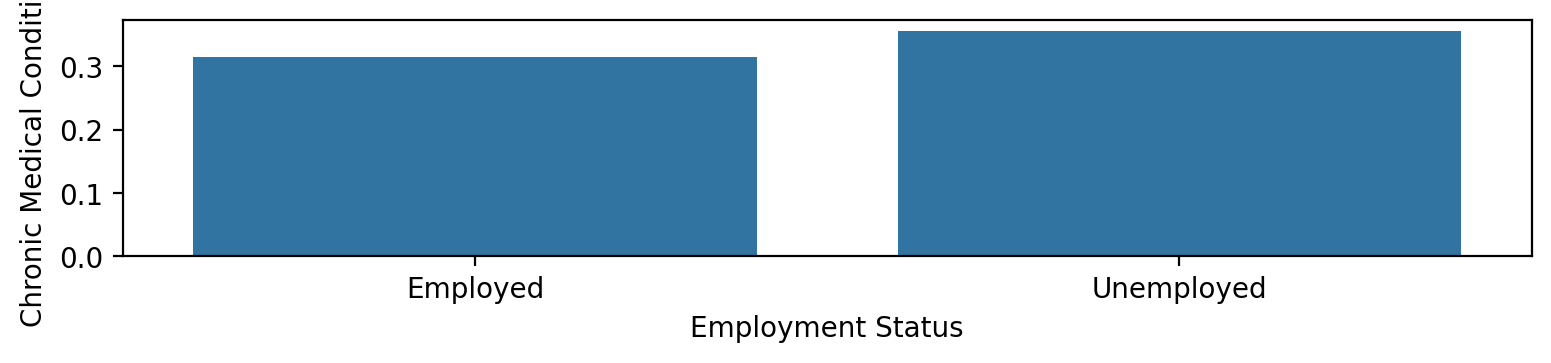

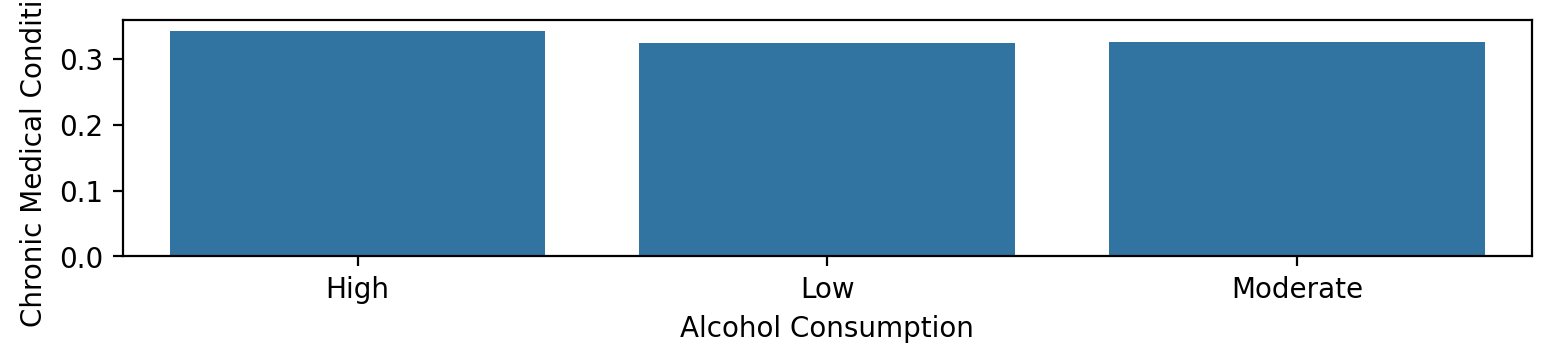

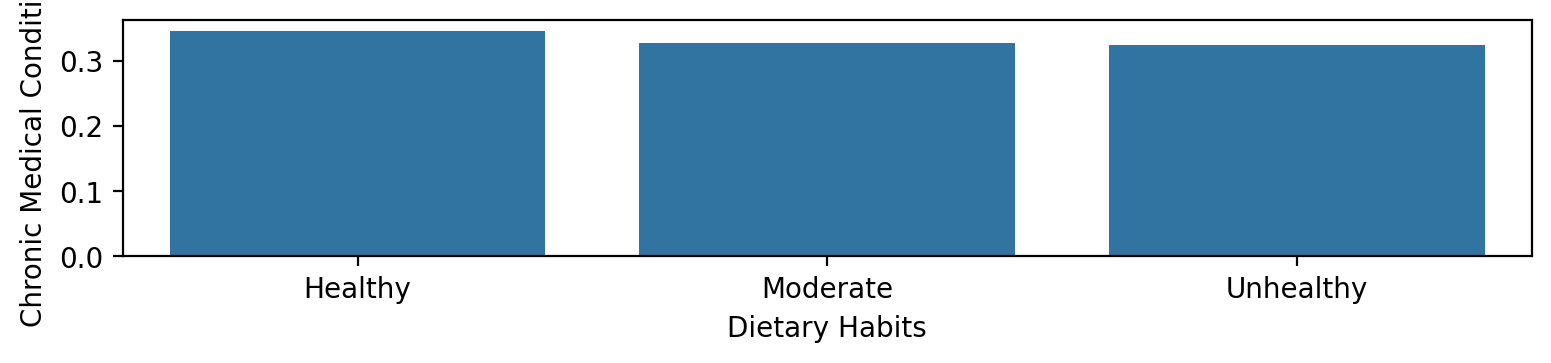

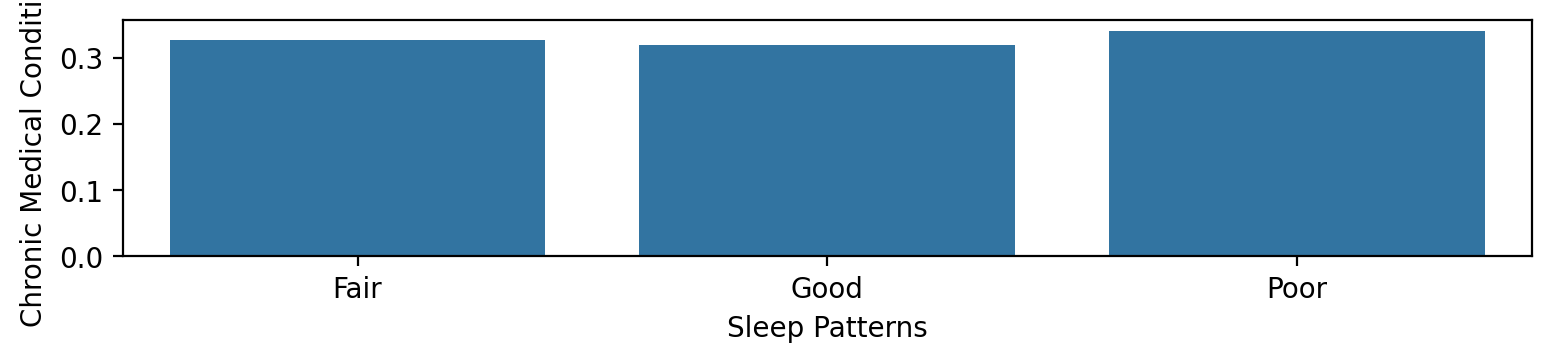

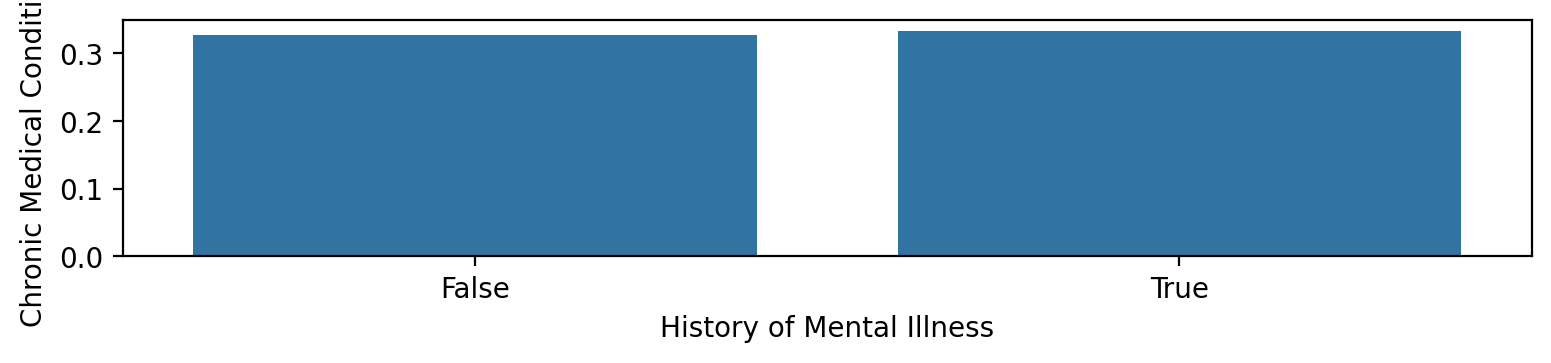

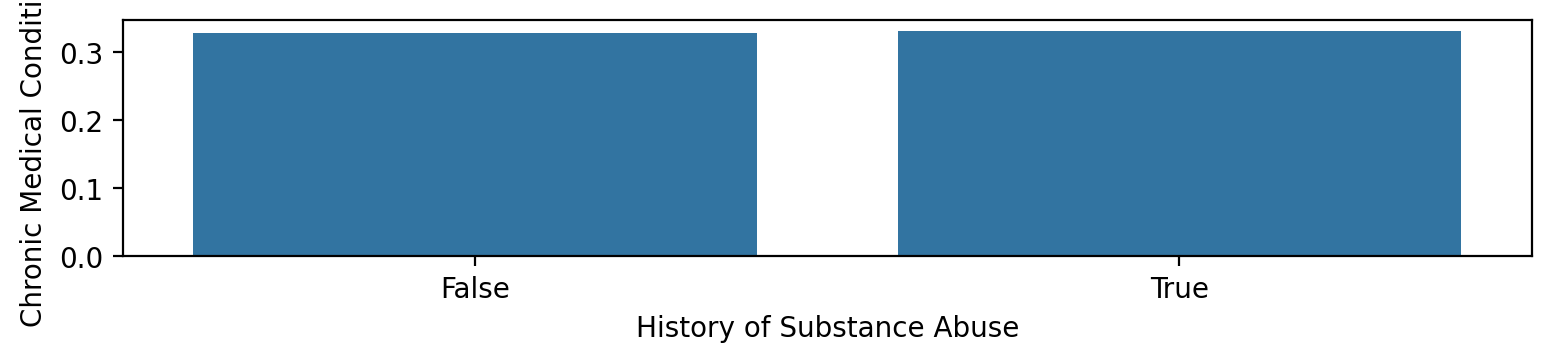

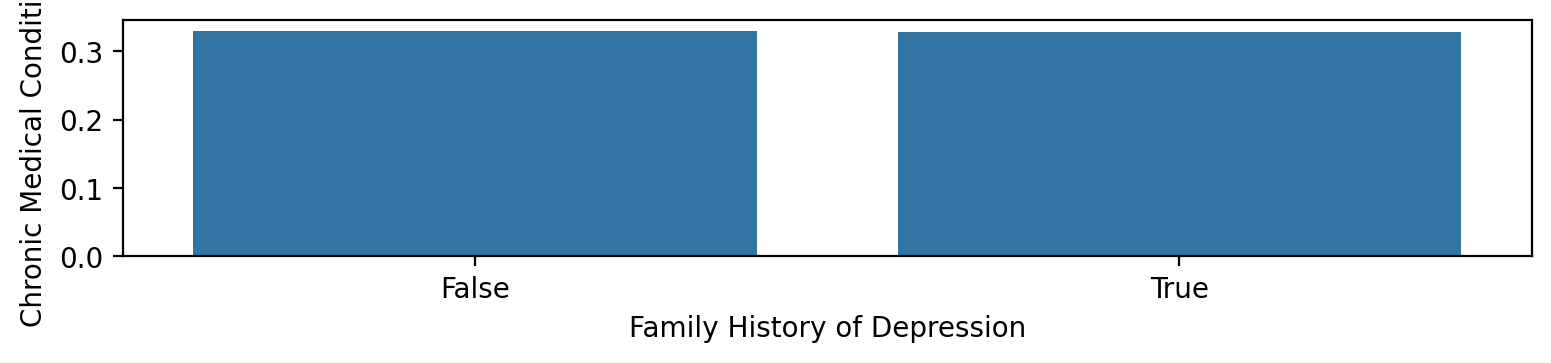

In [283]:
for index in range(len(categorical_columns)):
    plt.figure(figsize=(20, 20))
    plt.subplot(len(categorical_columns), 2, index+1)
    sns.barplot(data=data.groupby(categorical_columns[index])["Chronic Medical Conditions"].mean().reset_index(), 
                x = categorical_columns[index],
                y="Chronic Medical Conditions"
               )

<Axes: xlabel='Number of Children', ylabel='Chronic Medical Conditions'>

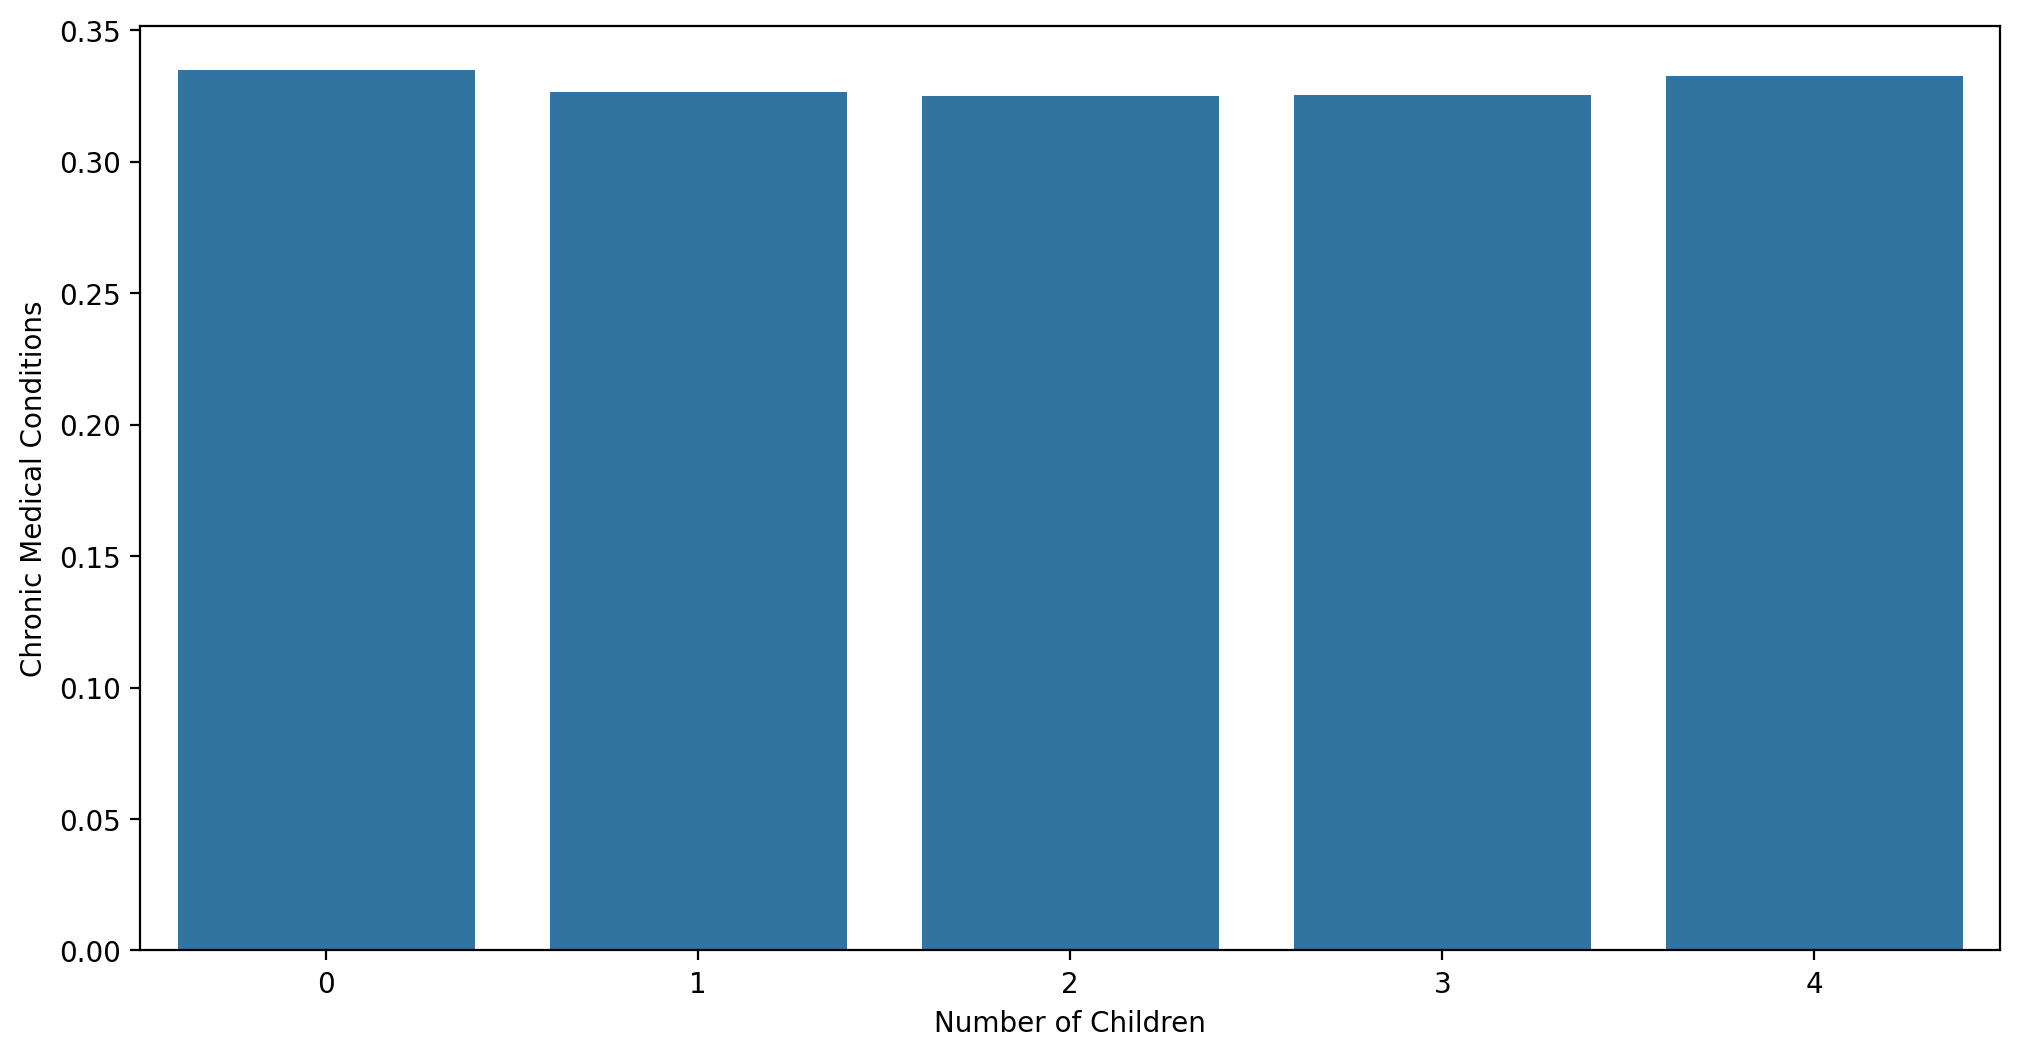

In [284]:
sns.barplot(data=data.groupby("Number of Children")["Chronic Medical Conditions"].mean().reset_index(), x="Number of Children", y="Chronic Medical Conditions")

<Figure size 4000x4000 with 0 Axes>

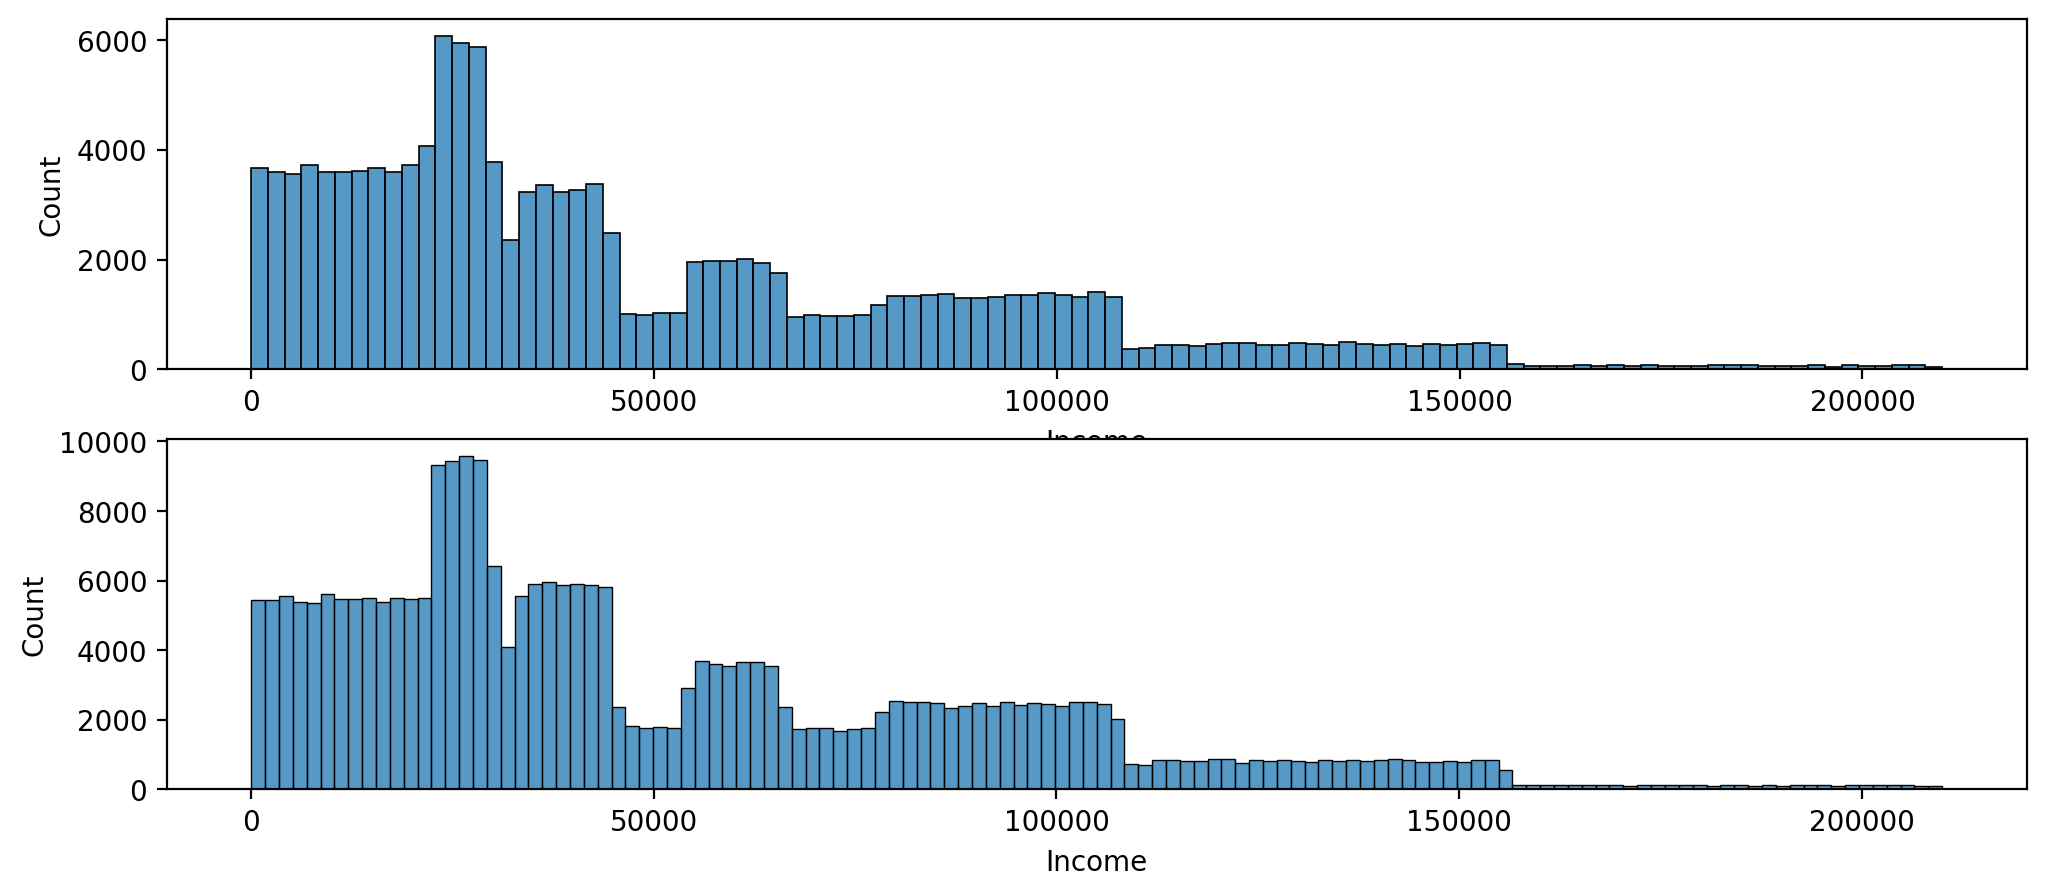

<Figure size 4000x4000 with 0 Axes>

In [285]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
sns.histplot(data[data["Chronic Medical Conditions"]]["Income"])
plt.subplot(2, 1, 2)
sns.histplot(data[~data["Chronic Medical Conditions"]]["Income"])
plt.figure(figsize=(20, 20))

Na powyższych wykresach nie widać większej zależności

Text(0.5, 1.0, 'Not-Depressed')

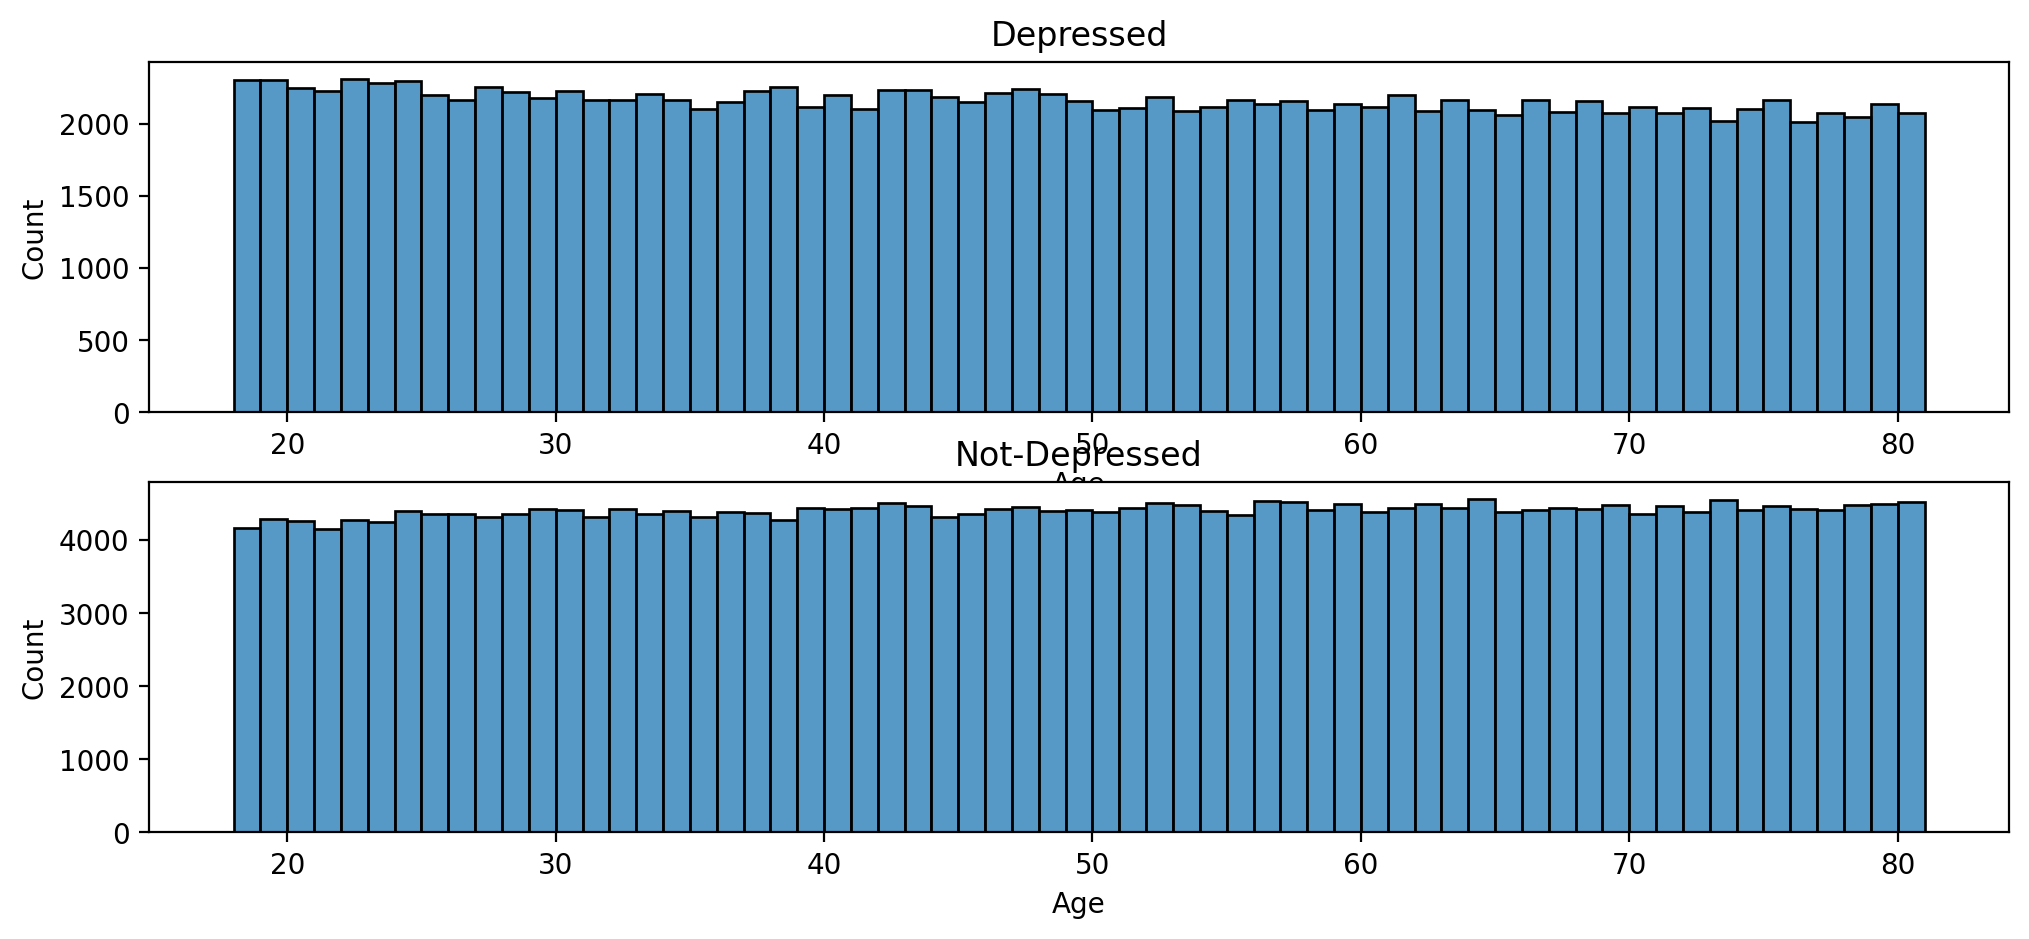

In [286]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
sns.histplot(data[data["Chronic Medical Conditions"]]["Age"], bins=np.linspace(18, 81, 64))
plt.title("Depressed")

plt.subplot(2, 1, 2)
sns.histplot(data[~data["Chronic Medical Conditions"]]["Age"], bins=np.linspace(18, 81, 64))

plt.title("Not-Depressed")

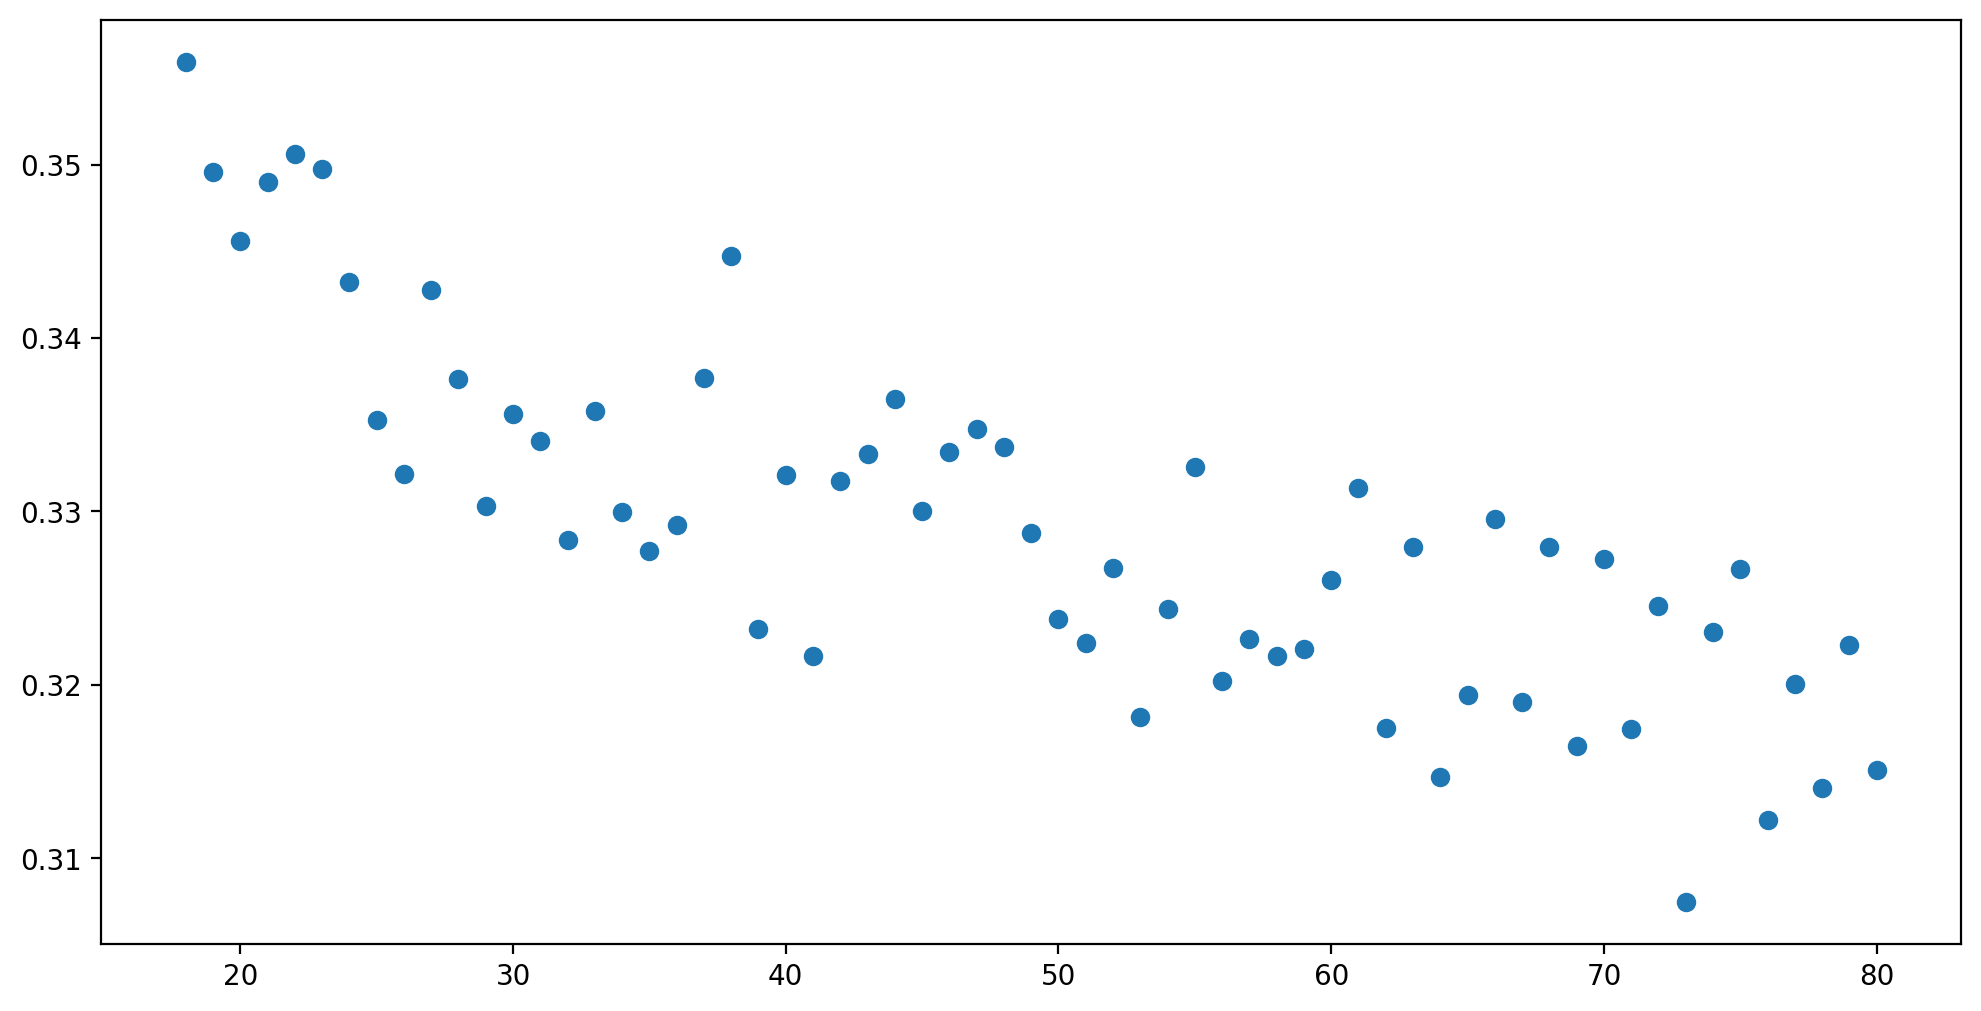

In [287]:
plt.scatter(data=data.groupby("Age")["Chronic Medical Conditions"].mean().reset_index(), x="Age", y="Chronic Medical Conditions")

Widać tutaj niewielki spadek odsetka osób z depresją w zależności od wieku

In [288]:
bin_width = 1_000
data["Income_binned"] = np.floor(data["Income"] / bin_width) * bin_width

<Axes: xlabel='Income_binned', ylabel='Chronic Medical Conditions'>

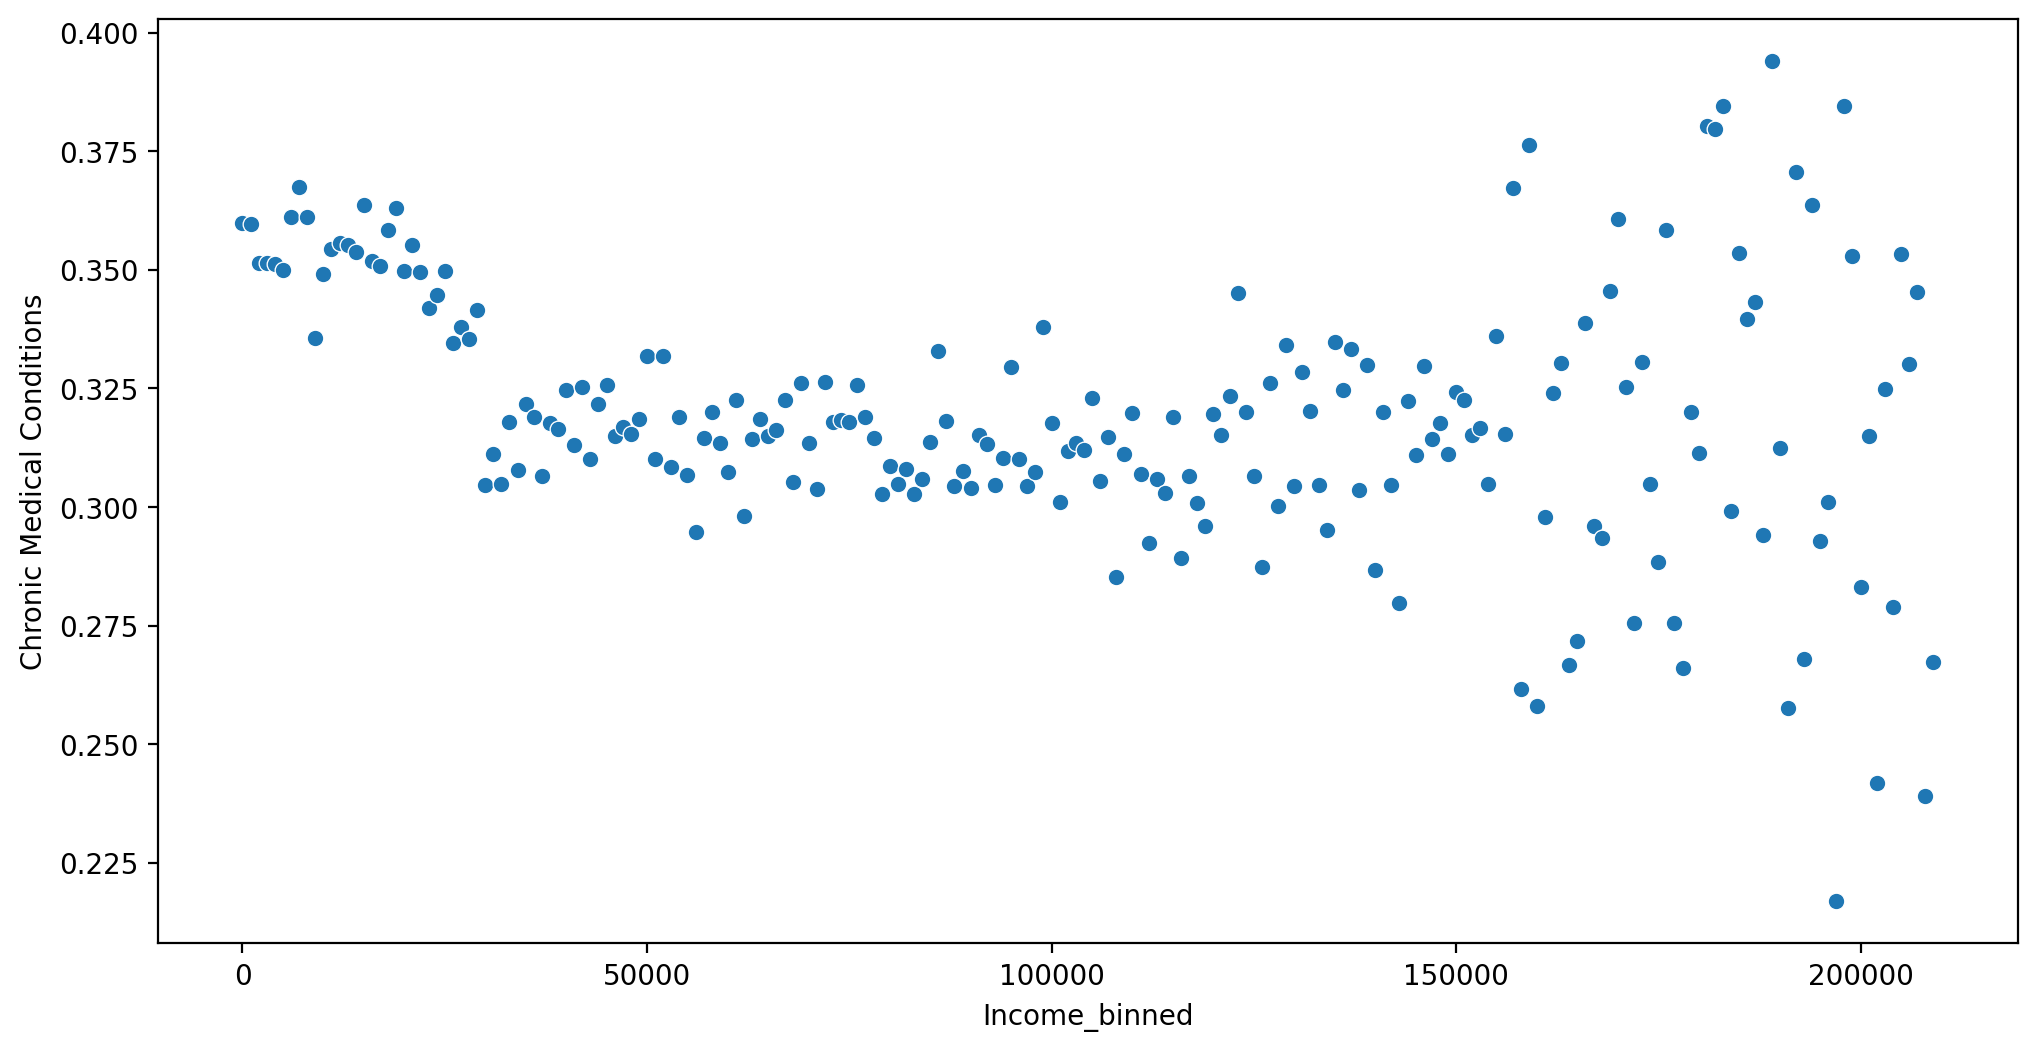

In [289]:
sns.scatterplot(data=data.groupby("Income_binned")["Chronic Medical Conditions"].mean().reset_index(), x="Income_binned", y="Chronic Medical Conditions")

Jest zauważalna różnica między bardzo niskimi zarobkami, a średnimi. Przy wyżych zarobkach wyniki wydają się losowe (prawdopodobnie przez mała liczbę danych) 